# Stock Market Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

In [2]:
df = pd.read_csv('stock_prices.csv')
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [3]:
columnns__to_drop = ['RowId','Date','SecuritiesCode','ExpectedDividend','SupervisionFlag','Volume','AdjustmentFactor','ExpectedDividend','Target']
df = df.drop(columnns__to_drop,axis=1)
df.head()

,Open,High,Low,Close
0,2734.0,2755.0,2730.0,2742.0
1,568.0,576.0,563.0,571.0
2,3150.0,3210.0,3140.0,3210.0
3,1510.0,1550.0,1510.0,1550.0
4,3270.0,3350.0,3270.0,3330.0


In [4]:
df.describe()

,Open,High,Low,Close
count,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06
mean,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03
std,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03
min,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01
25%,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03
50%,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03
75%,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03
max,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
dtypes: float64(4)
memory usage: 71.2 MB


In [6]:
df.shape

(2332531, 4)

In [7]:
df.isna().sum()

Open     7608
High     7608
Low      7608
Close    7608
dtype: int64

In [8]:
df['Open']= df['Open'].fillna(value=df['Open'].median())
df['High']=df['High'].fillna(value=df['High'].median())
df['Low']=df['Low'].fillna(value=df['Low'].median())
df['Close']=df['Close'].fillna(value=df['Close'].median())
df.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

# Data Visualization

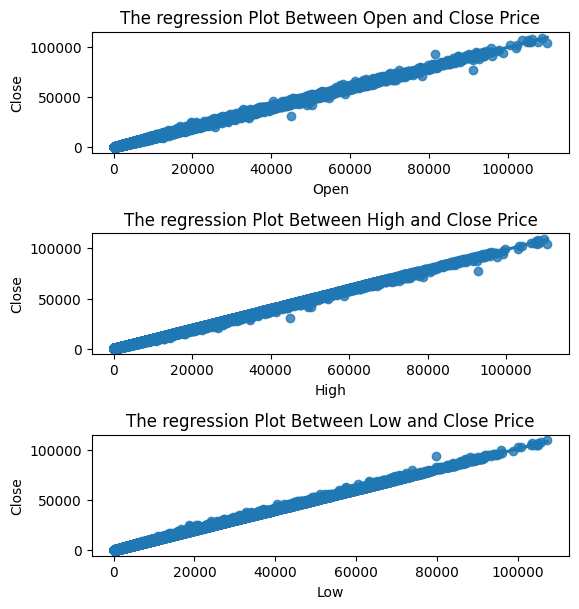

In [19]:
plt.figure(figsize=(6,6))



for index,col in enumerate(df.columns):
    if col =='Close':
        continue
    plt.subplot(3,1,index+1)
    plt.tight_layout()
    plt.title(f'The regression Plot Between {col} and Close Price')
    sns.regplot(data=df,x=col,y='Close')

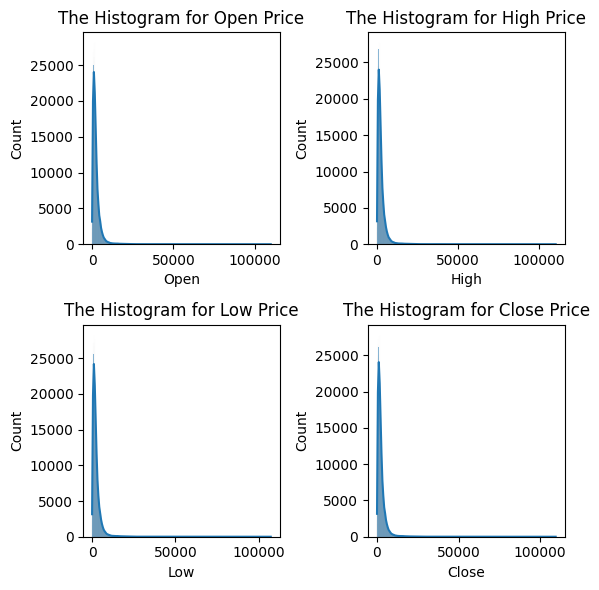

In [20]:
plt.figure(figsize=(6,6))

for i, col in enumerate(df.columns):
    plt.subplot(2,2,i+1)
    plt.title(f"The Histogram for {col} Price")
    plt.tight_layout()
    sns.histplot(data=df,x=col,kde=True)

In [9]:
x=df.drop(['Close'],axis=1)
y=df['Close']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train  ,y_test =train_test_split(x,y,train_size=0.80,random_state= 42)

print(f'x train shape = {x_train.shape}')
print(f'y train shape= {y_train.shape}')
print()
print(f'x test shape = {x_test.shape}')
print(f'y test shape = {y_test.shape}')

x train shape = (1866024, 3)
y train shape= (1866024,)

x test shape = (466507, 3)
y test shape = (466507,)


# 1- Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()

linear_model.fit(x_train,y_train)
y_linear_pred=linear_model.predict(x_train)

linear_train_mse = mean_squared_error(y_train,y_linear_pred)
r2_linear_train = r2_score(y_train,y_linear_pred)

y_linear_test_pred = linear_model.predict(x_test)
linear_test_mse = mean_squared_error(y_test,y_linear_test_pred)
r2_linear_test = r2_score(y_test,y_linear_test_pred)



# 2- Xgboost

In [12]:
from xgboost import XGBRegressor

XGB_model= XGBRegressor()

XGB_model.fit(x_train,y_train)

XGB_train_pred = XGB_model.predict(x_train)
XGB_train_mse = mean_squared_error(y_train,XGB_train_pred)
r2_xgb_train = r2_score(y_train,XGB_train_pred)

XGB_test_pred = XGB_model.predict(x_test)
XGB_test_mse = mean_squared_error(y_test,XGB_test_pred)
r2_xgb_test = r2_score(y_test,XGB_test_pred)


# 3- Neural Networks

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

nn_model =Sequential([
    Dense(units =15 ,activation ='relu',),
    Dense(units =8 ,activation ='relu'),
    Dense(units =8 ,activation ='relu'),
    Dense(units =1 ,activation ='linear')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='mean_squared_error')

nn_model.fit(x_train,y_train)

nn_train_pred = nn_model.predict(x_train)
nn_train_mse = mean_squared_error(y_train,nn_train_pred)
r2_train_nn = r2_score(y_train,nn_train_pred)
 
nn_test_pred = nn_model.predict(x_test)
nn_test_mse = mean_squared_error(y_test,nn_test_pred)
r2_test_nn = r2_score(y_test,nn_test_pred)





14579/14579 [==============================] - 19s 1ms/step


In [14]:

models_mse=pd.DataFrame({'Linear Regression' : [linear_train_mse,linear_test_mse],'XGBoost':[XGB_train_mse,XGB_test_mse],'Neural Networks':[nn_train_mse,nn_test_mse]})
models_mse.index=['Train','Test']
models_r2_score = pd.DataFrame({'Linear Regression' : [r2_linear_train,r2_linear_test],'XGBoost':[r2_xgb_train,r2_xgb_test],'Neural Networks':[r2_train_nn,r2_test_nn]})
models_r2_score.index=['Train','Test']

In [15]:
print("Mean Squared Error for each model:")
models_mse

Mean Squared Error for each model:


,Linear Regression,XGBoost,Neural Networks
Train,1229.885661,929406.132017,1478.739029
Test,1214.467718,909201.160729,1467.524306


In [16]:
print("R2 score for each model:")
models_r2_score*100

R2 score for each model:


,Linear Regression,XGBoost,Neural Networks
Train,99.990377,92.727809,99.988430
Test,99.990391,92.806014,99.988388


> Thats mean that the best model is the linear regression with 99.99% accuracy train data and 99.99% test data

In [18]:
# To save linear regression model
from joblib import dump
dump(linear_model,'linear_model.pkl')

['linear_model.pkl']